# 1. Importing data set

In [29]:
import kagglehub

# kagglehub.login()

# path = kagglehub.dataset_download("parisrohan/credit-score-classification")

# print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

historical_df = pd.read_csv('./datasets/train.csv', low_memory=False)
df = historical_df.copy()

# 2. Exploratory Data Analysis

In [2]:
df.head()
df.shape
df.columns
df.info(max_cols=90)

print('Columns having null value:')
df.columns[df.isnull().any()].to_list()

print('Columns without null value:')
df.columns[~df.isnull().any()].to_list()

df.describe().T

df.describe(exclude=np.number).T

df.Month.value_counts()

#####################################################

df_without_na = df.dropna().copy()

for i in df_without_na:
    print('\n', i, df_without_na[i].unique())

#####################################################

df_without_na[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good


# 3. Data Preprocessing  
- Impute missing values
- Correct data types
- Capping outliers
- Visualize key features
- Reduct dataset dimensionality and multicollinearity
- Encode
- Normalize
- Split train/test data

## 3.1 Data imputation
- Stripping of weird charater in number at beginning and end '_' , '-'
- Convert some object columns containing numerical data to int64 or float64
- Remove unwanted value by converting it to np.nan first
- Performs grouped Missing Value Imputation (MVI): Imputing data of same customer at different months, this example using mode of group-by data for each Customer_ID to replace np.nan

In [3]:
def preprocess_data_column_imputation(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):
    imputed_df = data.copy()
    
    # stripping unwanted values that might be at the beginning or end of the value
    if unwanted_value_strip is not None:
        if imputed_df[column].dtype == object:
            imputed_df[column] = imputed_df[column].str.strip(unwanted_value_strip)
            print(f"\nTrailing & leading {unwanted_value_strip} are removed")
    
    # replacing unwanted value with NaN
    if unwanted_value_replace is not None:
        imputed_df[column] = imputed_df[column].replace(unwanted_value_replace, np.nan)
        print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN")

    # perform missing value imputation (mvi) using "mode value (most occuring frequency)" after grouping data using column specified the the user
    if mvi_groupby and column:
        imputed_df[column] = imputed_df[column].replace('', np.nan)
        group_mode = imputed_df.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
        imputed_df[column] = imputed_df[column].fillna(group_mode)
        print("\nMissing values imputed with group mode")
    
    # performing missing value imputation using a user provided custom value
    if mvi_customval is not None:
        imputed_df[column] = imputed_df[column].replace('', np.nan)
        imputed_df[column] = imputed_df[column].replace([np.nan], mvi_customval)
        print(f"\nMissing values are replaced with '{mvi_customval}'")

    # changing the data type of the column based on user provided data type
    if datatype is not None:
        imputed_df[column] = imputed_df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    print('----------------------------------------------------')
    return imputed_df

def preprocess_data_imputation(in_data=df):
    imputed_df = in_data.copy()

    print("Column: Name")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='Name', mvi_groupby='Customer_ID')

    print("Column: Type_of_Loan")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='Type_of_Loan', mvi_customval='Not Specified')

    print("Column: SSN")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='SSN', mvi_groupby='Customer_ID', unwanted_value_replace='#F%$D@*&8')

    print("Column: Occupation")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='Occupation', mvi_groupby='Customer_ID', unwanted_value_replace='_______')

    print("Column: Credit_Mix")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column = 'Credit_Mix', unwanted_value_replace = '_', mvi_groupby = 'Customer_ID')

    print("Column: Payment_Behaviour")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='Payment_Behaviour', unwanted_value_replace='!@9#%8', mvi_groupby='Customer_ID')

    print("Column: Monthly_Inhand_Salary")
    df.Monthly_Inhand_Salary.isna().value_counts()
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column='Monthly_Inhand_Salary', mvi_groupby='Customer_ID')

    print("Column: Num_Credit_Inquiries")
    df.Num_Credit_Inquiries.isna().value_counts()
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column = 'Num_Credit_Inquiries', mvi_groupby = 'Customer_ID')

    # Stripping '_' from data of some columns (for some reason ¯\_(ツ)_/¯)

    print("Column: Age")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column = 'Age', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'int')

    print("Column: Annual_Income")
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column = 'Annual_Income', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'float')

    print("Column: Outstanding_Debt")
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Outstanding_Debt',unwanted_value_strip = '_',mvi_groupby = 'Customer_ID',datatype = 'float')

    print("Column: Amount_invested_monthly")
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Amount_invested_monthly',unwanted_value_strip = '_',mvi_groupby = 'Customer_ID',datatype = 'float')

    print("Column: Num_of_Loan")
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Num_of_Loan',unwanted_value_strip = '_',mvi_groupby = 'Customer_ID',datatype = 'int')

    print("Column: Num_of_Delayed_Payment")
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Num_of_Delayed_Payment',unwanted_value_strip = '_',mvi_groupby = 'Customer_ID',datatype = 'float')

    print("Column: Changed_Credit_Limit")
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Changed_Credit_Limit',unwanted_value_strip = '_',unwanted_value_replace = '_',mvi_groupby = 'Customer_ID',datatype = 'float')

    print("Column: Monthly_Balance")
    imputed_df.Monthly_Balance[imputed_df.Monthly_Balance == '__-333333333333333333333333333__'].value_counts()
    imputed_df = preprocess_data_column_imputation(data = imputed_df,column = 'Monthly_Balance',unwanted_value_strip = '_',unwanted_value_replace = '__-333333333333333333333333333__',mvi_groupby = 'Customer_ID',datatype = 'float')

    # creating a function that picks the year and month and then combines them to give total number of months
    def credit_history_in_months(val):
        if pd.notnull(val):
            years = int(val.split(' ')[0])
            month = int(val.split(' ')[3])
            return (years * 12) + month
        else:
            return val

    imputed_df.Credit_History_Age
    # applying the function to the column
    imputed_df['Credit_History_Age'] = imputed_df['Credit_History_Age'].apply(lambda x: credit_history_in_months(x)).astype(float)

    print('Column: Credit_History_Age')
    imputed_df = preprocess_data_column_imputation(data = imputed_df, column = 'Credit_History_Age', mvi_groupby = 'Customer_ID')
    # imputed_df.isna().sum()
    # imputed_df.dtypes
    return imputed_df

imputed_df = preprocess_data_imputation(in_data=df)

Column: Name

Missing values imputed with group mode
----------------------------------------------------
Column: Type_of_Loan

Missing values are replaced with 'Not Specified'
----------------------------------------------------
Column: SSN

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Credit_Mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Payment_Behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Monthly_Inhand_Salary

Missing values imputed with group mode
----------------------------------------------------
Column: Num_Credit_Inqui

In [4]:
imputed_df.Age

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

## 3.2 Outlier Capping
Based on min, max, quartile, median, etc. some probability and statistic theory

-------------------------------------------------------------------
Numeric column: Age
Lower, upper bounds: -3.0 69.0
Before:(2781, 28)
After: (0, 28)
-------------------------------------------------------------------



-------------------------------------------------------------------
Numeric column: Annual_Income
Lower, upper bounds: -60542.630000000005 152791.05
Before:(2783, 28)
After: (0, 28)
-------------------------------------------------------------------



-------------------------------------------------------------------
Numeric column: Monthly_Inhand_Salary
Lower, upper bounds: -4875.552083333334 12463.95125
Before:(2010, 28)
After: (0, 28)
-------------------------------------------------------------------



-------------------------------------------------------------------
Numeric column: Num_Bank_Accounts
Lower, upper bounds: -3.0 13.0
Before:(1315, 28)
After: (0, 28)
-------------------------------------------------------------------



-------------------------

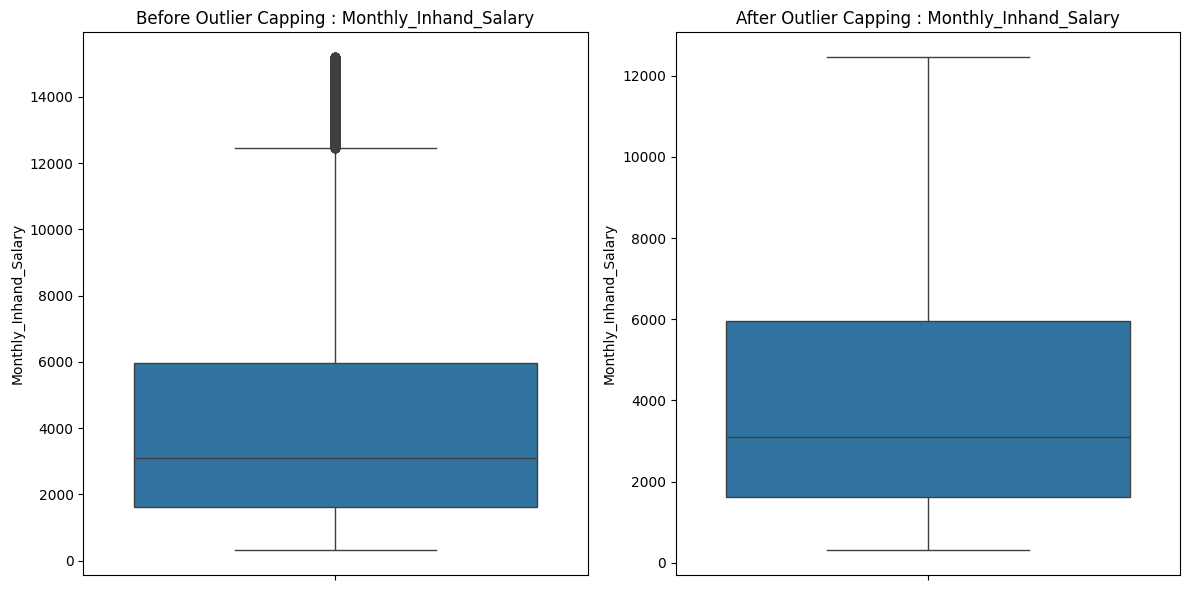

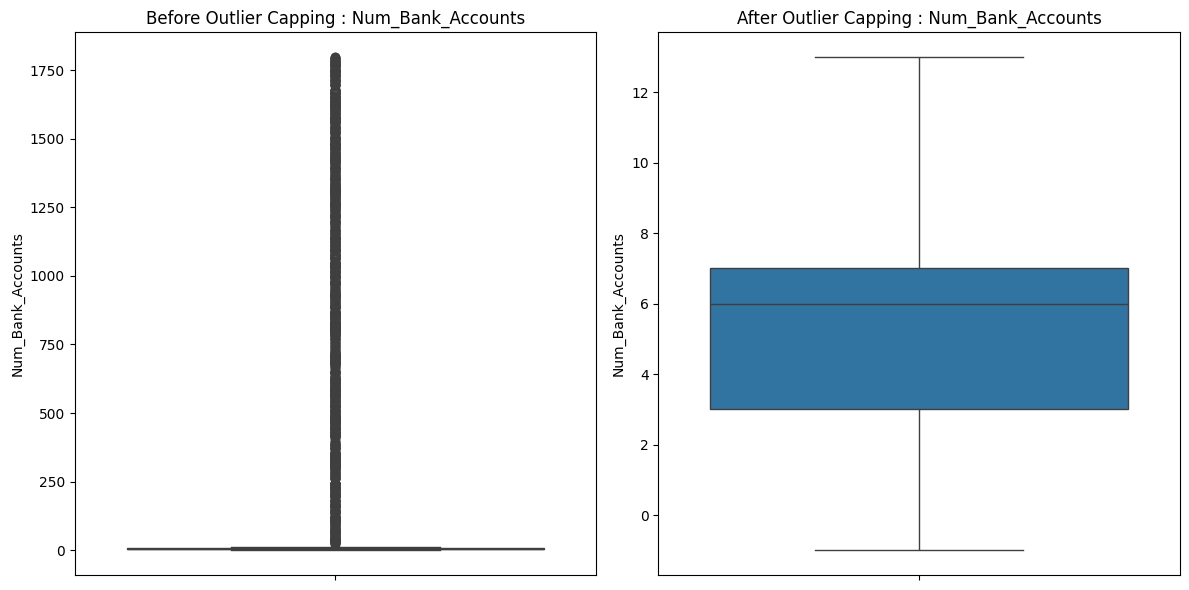

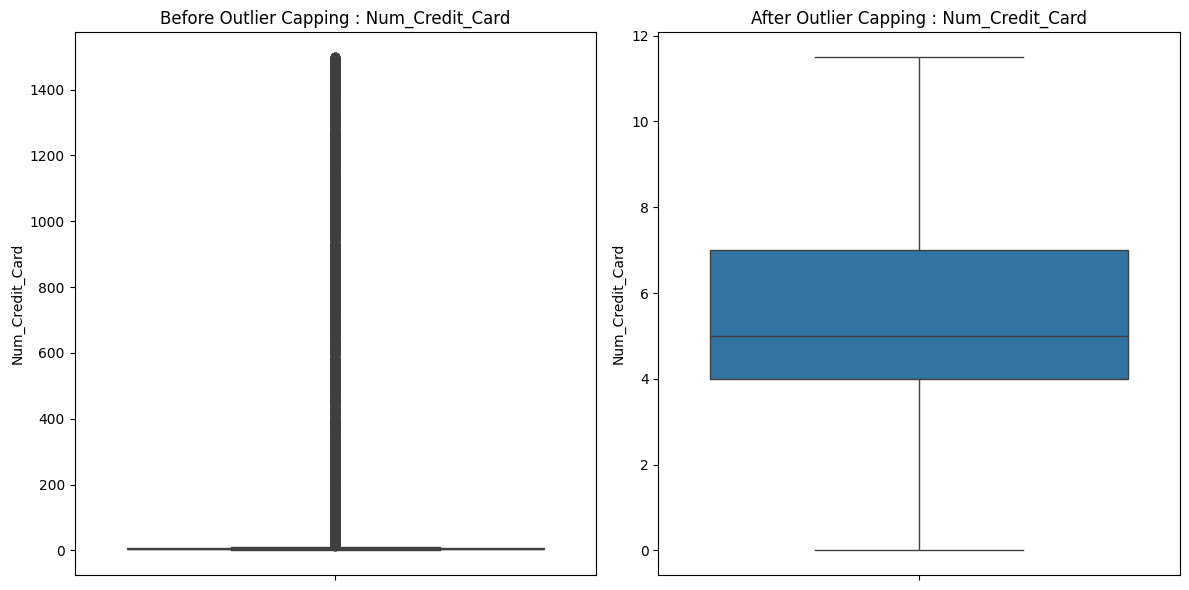

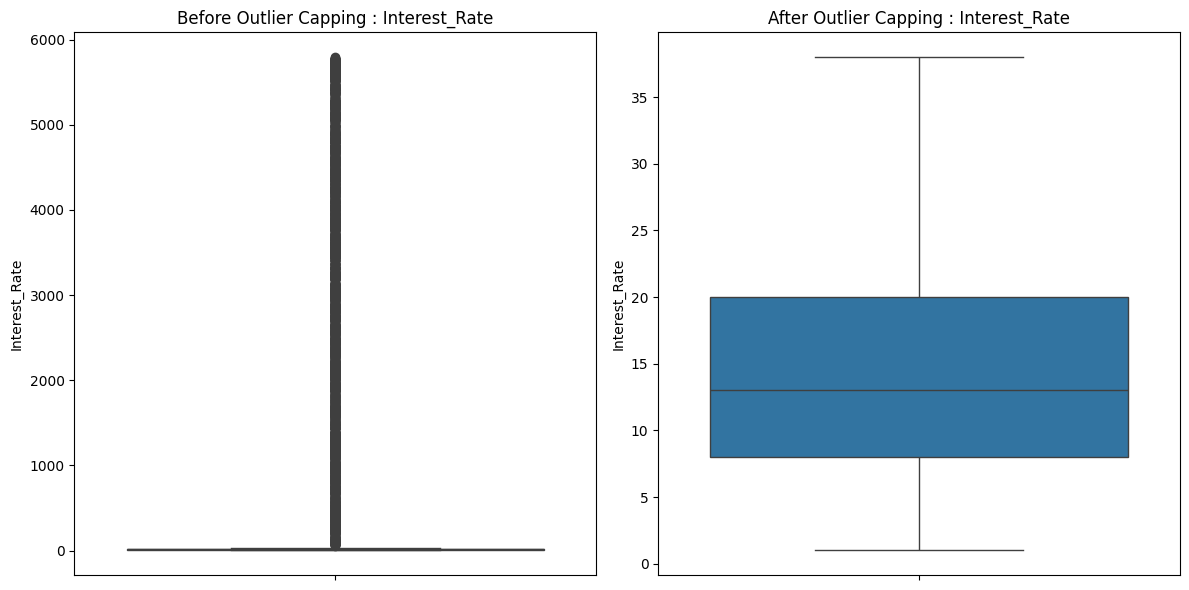

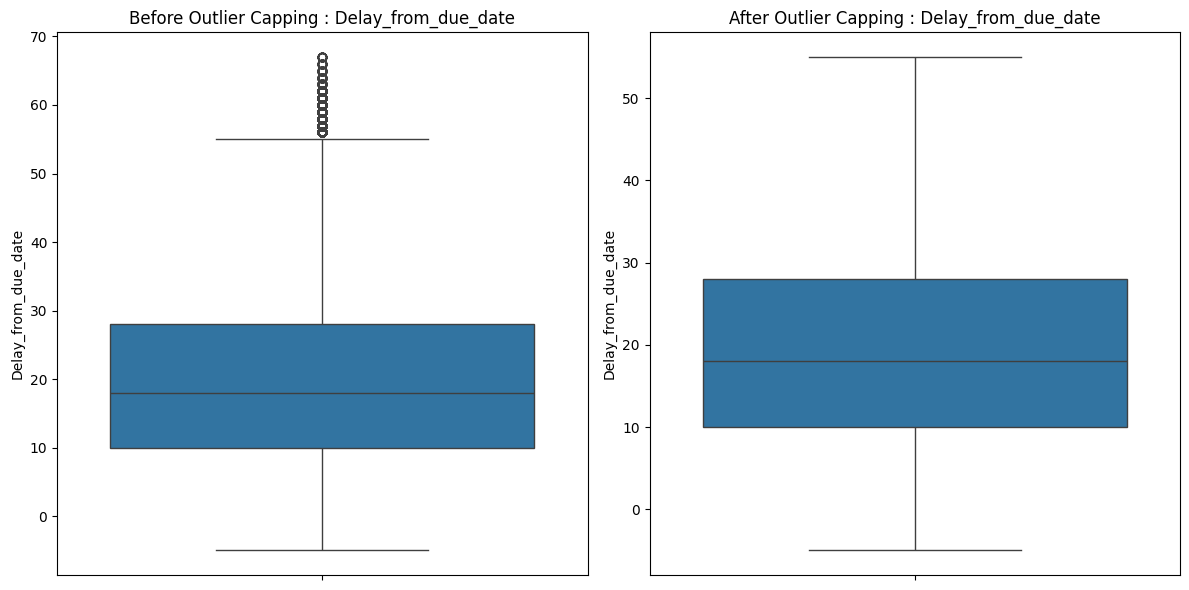

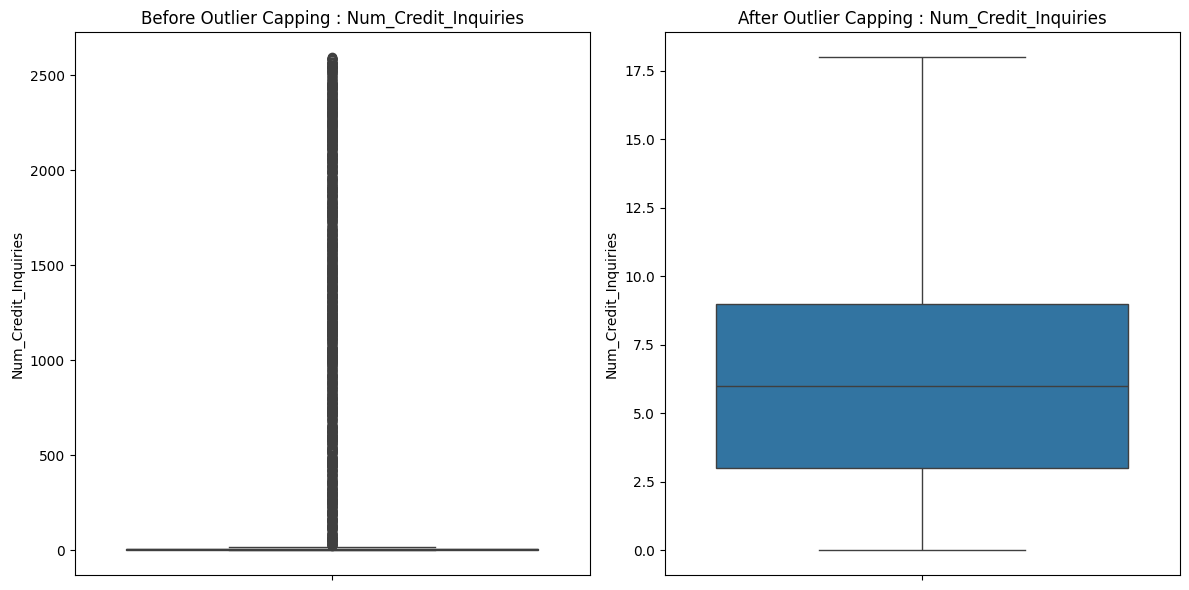

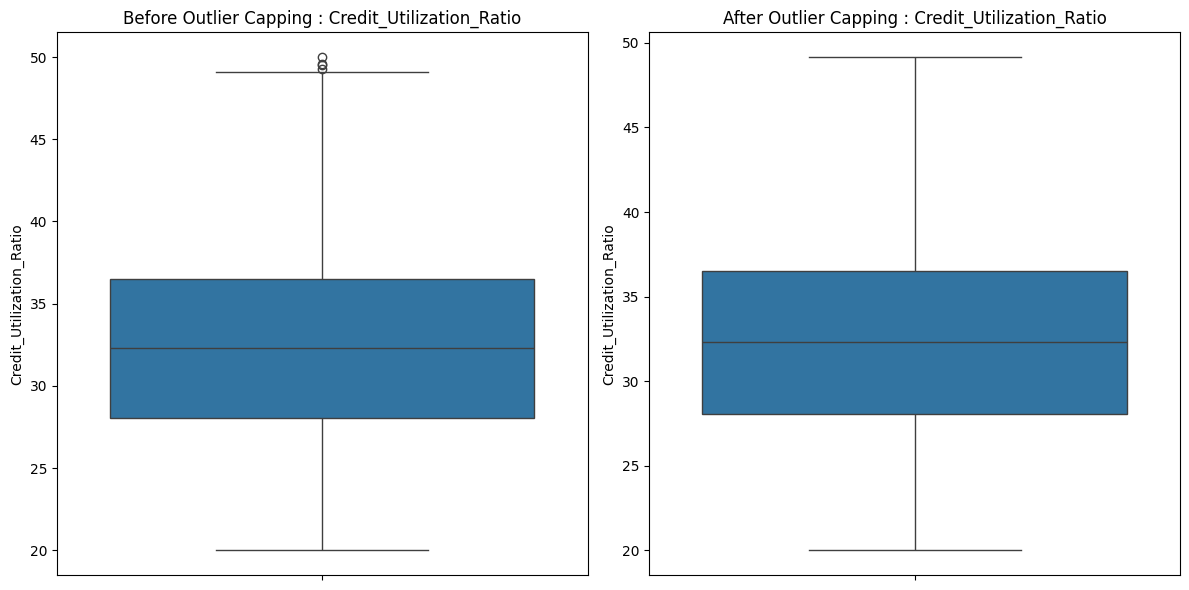

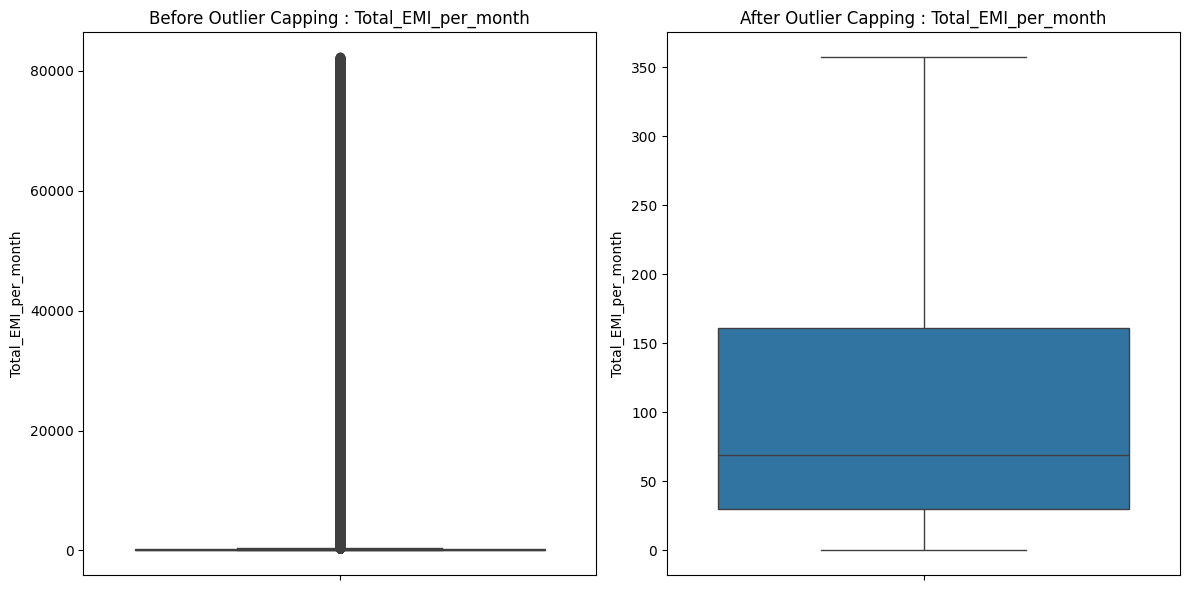

In [5]:
def outlier_capping(data=imputed_df, threshold = 1.5):
    # making a copy of the input DataFrame
    data_copy = data.copy()
    
    # creating a empty list to save the outlier indices
    outlier_indices = []

    # calculating quartile 1 and 3 for every numerical column in the data
    for column in data_copy.columns:
        # print('Looping: ' + column)
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            print('-------------------------------------------------------------------')
            print('Numeric column: ' + column)
            # calculating quartiles
            Q1 = data_copy[column].quantile(0.25)
            Q3 = data_copy[column].quantile(0.75)

            # calculating inter-quantile range
            IQR = Q3 - Q1

            # defining the upper and lower outlier bounds
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            print('Lower, upper bounds:', lower_bound, upper_bound)

            # identifying outliers
            outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
            print("Before:" + str(outliers.shape))
            outlier_indices.extend(outliers.index)

            # capping outliers
            data_copy[column] = np.where(data_copy[column] < lower_bound, lower_bound, data_copy[column])
            data_copy[column] = np.where(data_copy[column] > upper_bound, upper_bound, data_copy[column])

            # outliers after capping
            outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
            print("After: " + str(outliers.shape))

            # removing duplicates from outlier_indices list
            outlier_indices = list(set(outlier_indices))
            print('-------------------------------------------------------------------\n\n\n')
    return data_copy, outlier_indices

# Create boxplots for every column before/after outlier capping, comparing the columns with and without the outliers
def outlier_capping_comparison(data, data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12,6))
    
            # plotting the numerical columns from the original dataframe
            plt.subplot(1, 2, 1)
            sns.boxplot(data=data[column])
            plt.title(f'Before Outlier Capping : {column}')

            # plot distribution of the numerical columns where outliers are capped
            plt.subplot(1, 2, 2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After Outlier Capping : {column}')

            # showing output
            plt.tight_layout()
            plt.show()

imputed_outlier_df, outliers = outlier_capping(data=imputed_df)

# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data = df, data_processed = imputed_outlier_df, outlier_indices=outliers)

## 3.3 Visualization
After handling all missing values, exploring data by visualization

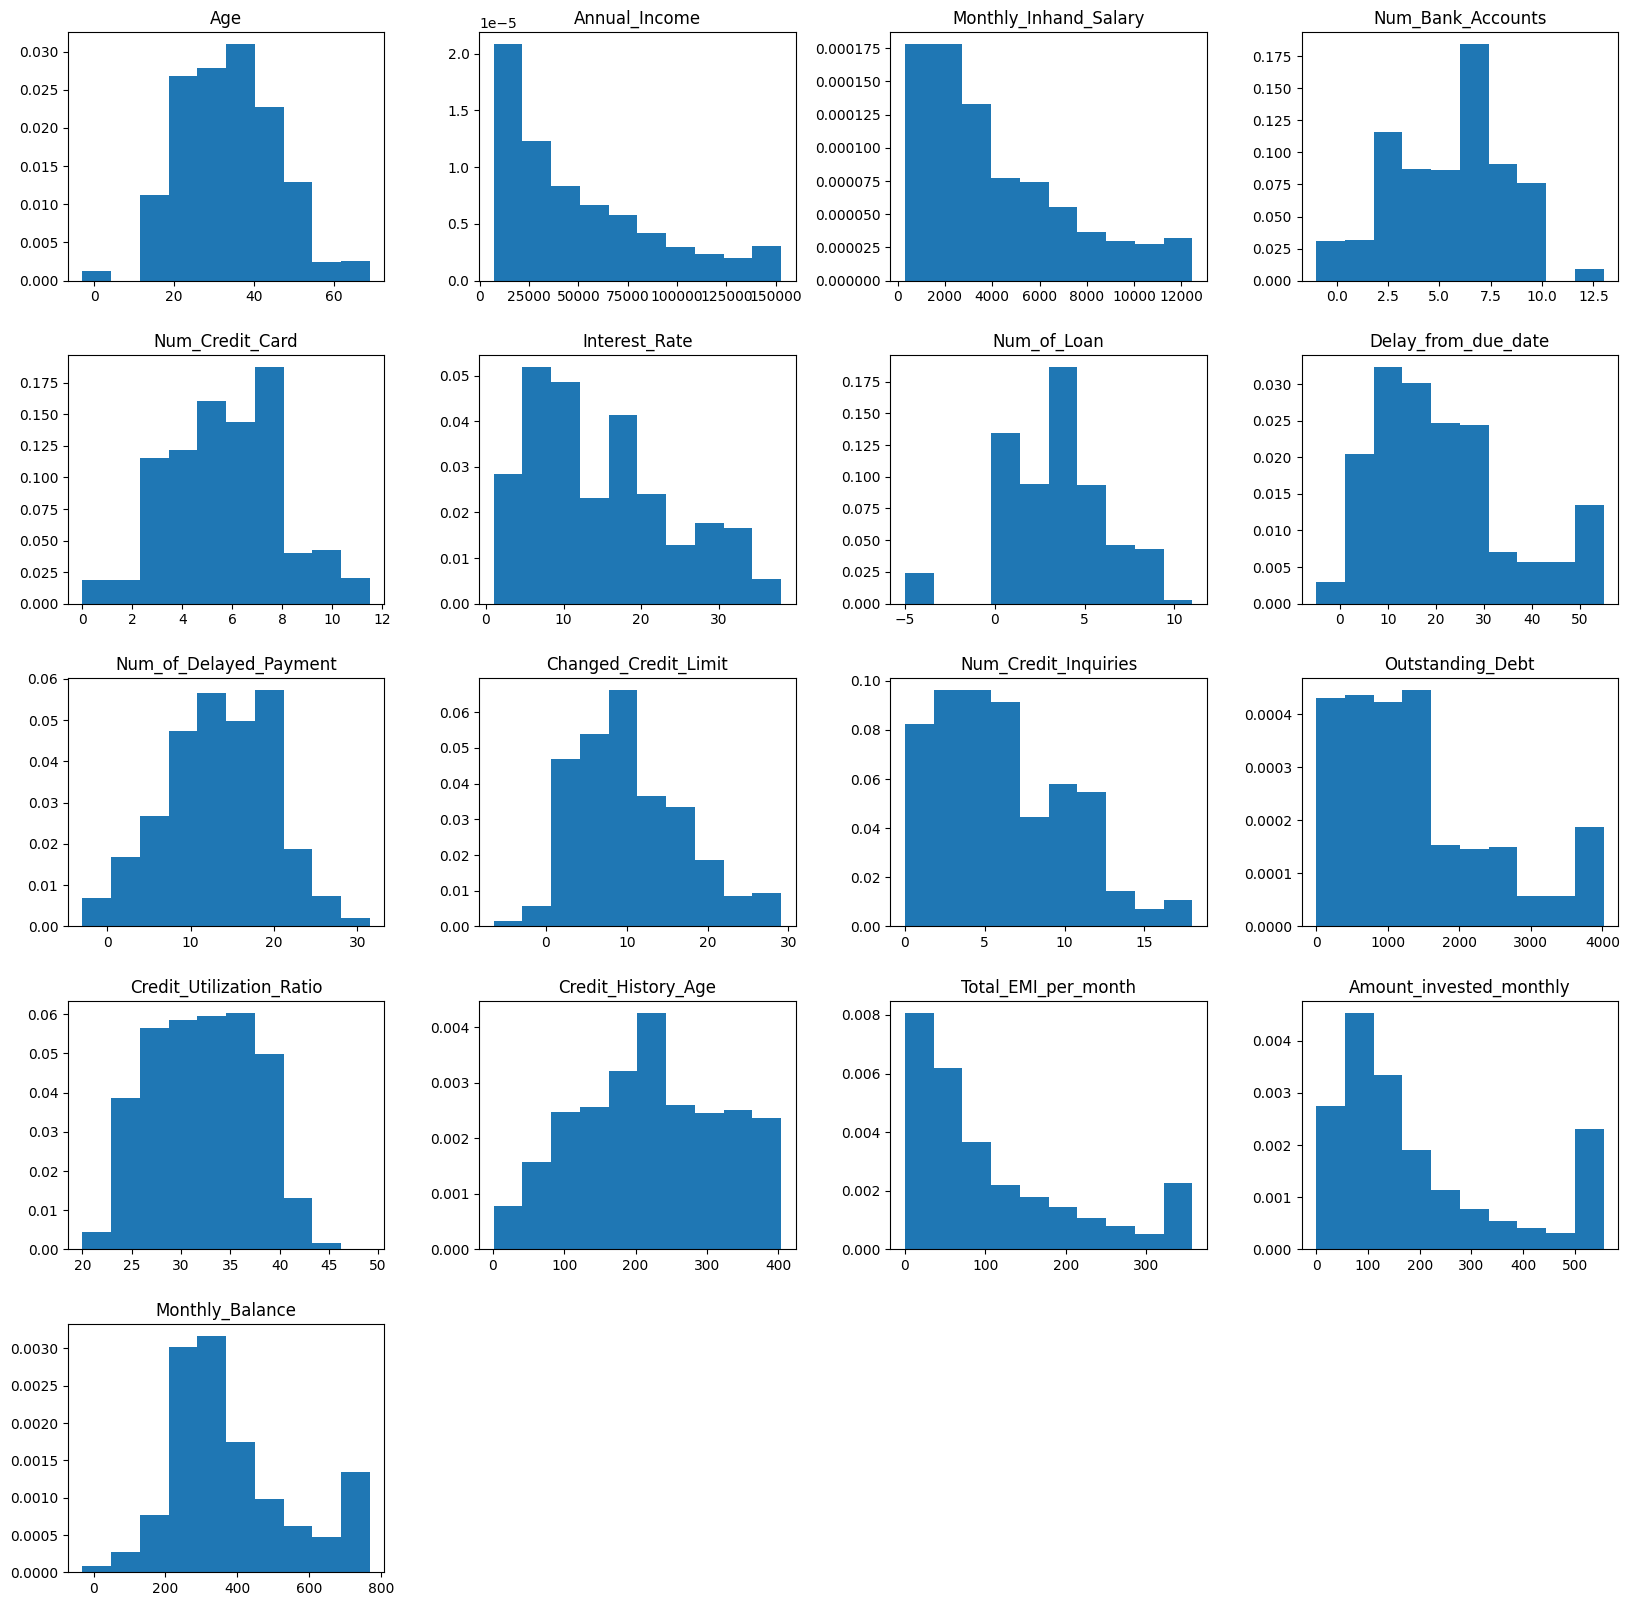

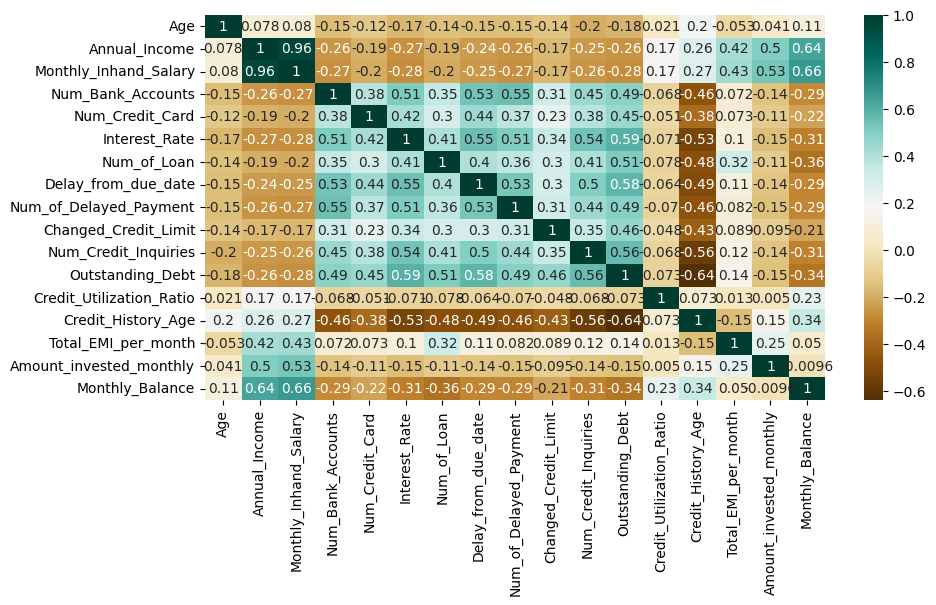

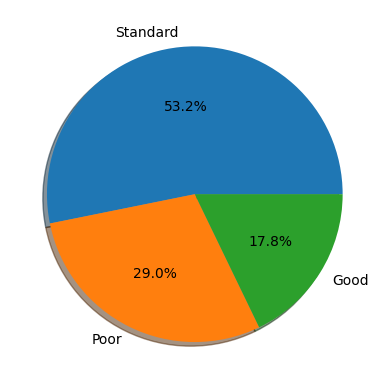

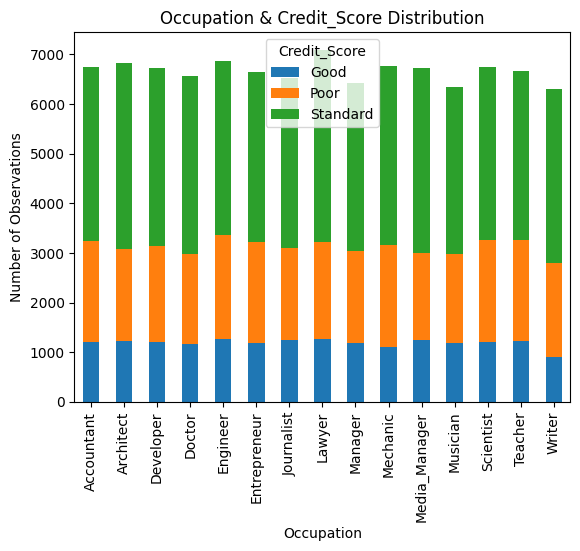

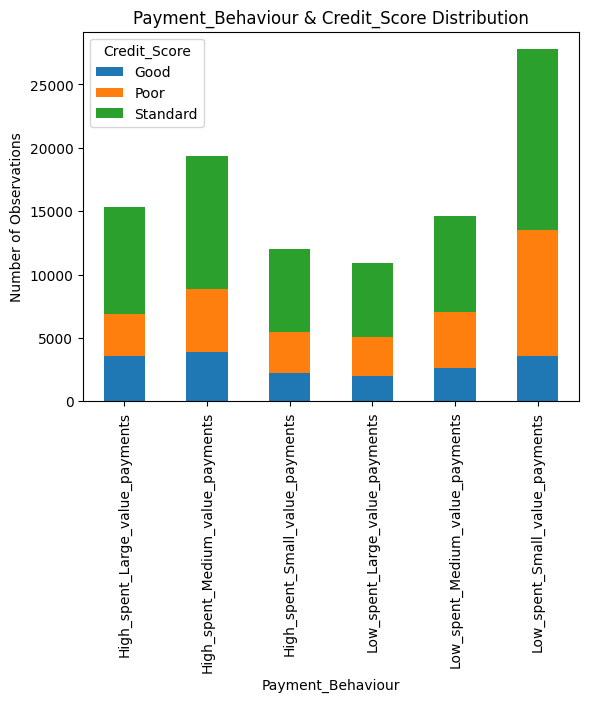

In [6]:
def visulization(in_data = imputed_outlier_df):
    # Histogram for numerical columns
    in_data.hist(figsize=(20,20), grid=False, density=True)
    plt.show()

    # Correlation matrix: brief view of multicollinearity in the data
    plt.figure(figsize=(10, 5))
    corr_matrix = in_data.select_dtypes(include=["number"]).corr()
    sns.heatmap(corr_matrix, cmap="BrBG", annot=True)
    plt.show()

    # Checking target value distribution using pie chart
    credit_score_vals = in_data.Credit_Score.value_counts().index
    credit_score_labels = in_data.Credit_Score.value_counts().values
    in_data.Credit_Score.value_counts()

    plt.pie(data=in_data, x=credit_score_labels, labels=credit_score_vals,autopct='%1.1f%%', shadow=True,radius=1)
    plt.show()

    # Stacked Bar Crosstab: display distribution of a category column accross different class of another category column
    def create_stacked_bar_crosstab(data, cat_col1, cat_col2, rotation_val = 0):
        # creating cross tab between two variables
        pd.crosstab(data[cat_col1], data[cat_col2]).plot(kind='bar', stacked=True)
        # adding title
        plt.title(f'{cat_col1} & {cat_col2} Distribution')

        # adding x and y label
        plt.xlabel(f'{cat_col1}')
        plt.ylabel('Number of Observations')

        # option for rotating xticks
        plt.xticks(rotation = rotation_val)
        plt.show()

    # Interaction between occupation and credit score
    create_stacked_bar_crosstab(in_data, 'Occupation', 'Credit_Score', rotation_val=90)

    # Between behavior payment and Credit score
    create_stacked_bar_crosstab(in_data, 'Payment_Behaviour', 'Credit_Score', rotation_val=90)

visulization()

With all missing values handled, most visiualization is possible at this stage
Some other suggestion:
- Scatterplot: interactions of numerical-numerical columns
- Bar plot: interactions of numerical-categorical columns

## 3.4 Encoding
Handling of categorical data, change to numerical representation by some encoding methods. So that the data can be input to neural network training model
2 types of categorical data:
- Ordinal categories: has some order of priority between values -> Label Encoding. Example is 'Good', 'Bad', 'Terrible' -> 3,2,1
- Nomimal categories: no order whatsover -> One-hot Encoding. Example 'Red', 'Green', 'Blue' -> Three new columns
  - isRed: 1,0,0
  - isBlue: 0,0,1
  - isGreen: 0,1,0

In [7]:
from sklearn.preprocessing import LabelEncoder

def categorical_encoding(in_data = imputed_outlier_df):
    imputed_outlier_encoded_df = in_data.copy()

    # Convert month to numerical
    imputed_outlier_encoded_df['Month'] = pd.to_datetime(imputed_outlier_encoded_df.Month, format='%B').dt.month
    imputed_outlier_encoded_df.Month

    # Counting number of unique values to decide what encoding method to use
        # Large number of unique -> label
        # Small number of unique -> one-hot if nominal, label if ordinal
    categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
    for column in categorical_cols:
        unique_values_count = len(imputed_outlier_encoded_df[column].unique())
        print(f"Number of unique values in the '{column}' column:", unique_values_count)

    # Label encoding type of loan (too many unique value)
    imputed_outlier_encoded_df.Type_of_Loan
    label_encoder = LabelEncoder()
    imputed_outlier_encoded_df['Type_of_Loan'] = label_encoder.fit_transform(imputed_outlier_encoded_df['Type_of_Loan'])
    imputed_outlier_encoded_df.Type_of_Loan.unique()
    
    # Label encoding Payment_of_Min_Amount (ordinal relationship)
    print('Unique values in Payment_of_Min_Amount are: ', imputed_outlier_encoded_df['Payment_of_Min_Amount'].unique())
    target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}
    imputed_outlier_encoded_df['Payment_of_Min_Amount'] = imputed_outlier_encoded_df['Payment_of_Min_Amount'].map(target_mapping)
    imputed_outlier_encoded_df['Payment_of_Min_Amount'].value_counts()

    # Performing one-hot encoding on the rest categoricals columns (Nominal, small amount of unique values)
    # mentioning the categorical columns where one-hot encoding needs to be performed
    columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour']
    # generate one-hot columnes
    df_dummy = pd.get_dummies(imputed_outlier_encoded_df[columns_to_encode])
    df_dummy
    # concatenating the dummy variables with the original dataframe (axis=1 column-side merge, axis=0 row-side merge)
    imputed_outlier_encoded_df = pd.concat([imputed_outlier_encoded_df, df_dummy], axis=1)

    # Finally, we now encode the target variable.

    if 'Credit_Score' in imputed_outlier_encoded_df.columns:
        target_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
        imputed_outlier_encoded_df['Credit_Score'] = imputed_outlier_encoded_df['Credit_Score'].map(target_mapping)
    # imputed_outlier_encoded_df.select_dtypes(exclude='object').info()

    imputed_outlier_encoded_df = imputed_outlier_encoded_df.drop(['ID', 'Customer_ID', 'SSN', 'Name'] + columns_to_encode, axis=1)
    imputed_outlier_encoded_df.shape

    return imputed_outlier_encoded_df

imputed_outlier_encoded_df = categorical_encoding(in_data = imputed_outlier_df)

Number of unique values in the 'Occupation' column: 15
Number of unique values in the 'Type_of_Loan' column: 6260
Number of unique values in the 'Credit_Mix' column: 3
Number of unique values in the 'Payment_of_Min_Amount' column: 3
Number of unique values in the 'Payment_Behaviour' column: 6
Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


## 3.5 Feature reduction
Moving several indepedent columns data  
Finding important variable using some feature_selection models

## 3.6 Checking multicollinearity
Some columns that depends on other column or combination of columns, detect those case and remove dependent columns help improve training process

In [8]:
# importing library for calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif

def choose_imp_columns(in_data = imputed_outlier_encoded_df):
    # extracting the predictor variables
    X = in_data.drop('Credit_Score', axis=1)
    # extracting the target variable
    y = in_data['Credit_Score']

    # Method 1: finding feature importance using Tree-Based method
    rf_model = RandomForestClassifier()
    rf_model.fit(X, y)
    feature_importances = rf_model.feature_importances_
    top_10_rf = X.columns[feature_importances.argsort()[-10:][::-1]]

    # Method 2: using Recursive Feature Elimination (RFE)
    # rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
    # rfe_selector.fit(X, y)
    # top_10_rfe = X.columns[rfe_selector.support_]
    top_10_rfe = []

    # Method 3: using Univariate Feature Selection
    selector = SelectKBest(score_func=f_classif, k=10)
    selector.fit(X, y)
    top_10_univariate = X.columns[selector.get_support()]

    print("Top 10 variables from Tree-Based Method:", ', '.join(top_10_rf))
    print("---------------------------------------------------------------------------------------------------------")
    print("Top 10 variables from Method Recursive Feature Elimination:", ', '.join(top_10_rfe))
    print("---------------------------------------------------------------------------------------------------------")
    print("Top 10 variables from Univariate Feature Selection:", ', '.join(top_10_univariate))

    imp_columns = list(set(top_10_rf.tolist() + [] + top_10_univariate.tolist()))
    imp_columns.append('Annual_Income') # for the 2nd method run too long, miss this column
    imp_columns.append('Monthly_Inhand_Salary') # for the 1st method somehow return different results from article
    print('Number of selected columns are: ', len(imp_columns))
    return imp_columns

def filter_out_correlate_column_pairs(in_data = imputed_outlier_encoded_df):
    imp_columns = choose_imp_columns(in_data)
    
    # extracting the selected independent features
    X_selected = in_data[imp_columns]

    # creating correlation matrix (|corr| -> 0: no correlation, |corr| -> 1: correlate/inverse)
    correlation_matrix = X_selected.corr()
    correlation_matrix

    # finding highly correlated feature pairs
    highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)
    print(highly_correlated_pairs)

    print("Highly correlated pairs of variables and their correlation values:\n")
    checked_pairs = set() 
    for col1 in X_selected.columns:
        for col2 in X_selected.columns:
            if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
                print('col1, col2: ',col1,col2)
                print('type(highly_correlated_pairs.loc[col1, col2])', type(highly_correlated_pairs.loc[col1, col2]), highly_correlated_pairs.loc[col1, col2])
                if type(highly_correlated_pairs.loc[col1, col2]) == np.bool_ and highly_correlated_pairs.loc[col1, col2]:
                    correlation_value = correlation_matrix.loc[col1, col2]
                    print(f"{col1} - {col2}: {correlation_value:.2f}")
                    checked_pairs.add((col1, col2))

    # Remove correlated columns (choose 1 of each pair)
    X_selected = X_selected.drop(['Annual_Income', 'Credit_Mix_Good', 'Credit_Mix_Bad'], axis=1)
    X_selected.info()

    # Variance inflation factor (VIF): To eliminate multicollinearity, we will calculate the VIF value for each independent feature.
    vif_df = pd.DataFrame()
    vif_df["Variable"] = X_selected.columns
    # vif_df["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
    print("Variance Inflation Factors:")
    # print(vif_df)

    print('Number of selected columns are: ', len(X_selected.columns))
    final_X_cols = X_selected.columns.tolist()
    print("Final selected predictors are: ", ', '.join(final_X_cols))
    df_final = in_data[final_X_cols + ['Credit_Score']]
    return df_final, final_X_cols

imputed_outlier_encoded_reduced_df, final_X_cols = filter_out_correlate_column_pairs(imputed_outlier_encoded_df)
imputed_outlier_encoded_reduced_df

Top 10 variables from Tree-Based Method: Outstanding_Debt, Interest_Rate, Credit_History_Age, Delay_from_due_date, Changed_Credit_Limit, Credit_Mix_Good, Credit_Mix_Standard, Credit_Utilization_Ratio, Monthly_Inhand_Salary, Num_Credit_Inquiries
---------------------------------------------------------------------------------------------------------
Top 10 variables from Method Recursive Feature Elimination: 
---------------------------------------------------------------------------------------------------------
Top 10 variables from Univariate Feature Selection: Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount, Credit_Mix_Bad, Credit_Mix_Good, Credit_Mix_Standard
Number of selected columns are:  15
                          Monthly_Inhand_Salary  Interest_Rate  \
Monthly_Inhand_Salary                     False          False   
Interest_Rate                             False          False   


,Monthly_Inhand_Salary,Interest_Rate,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Payment_of_Min_Amount,Changed_Credit_Limit,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age,Outstanding_Debt,Credit_Mix_Standard,Monthly_Inhand_Salary,Credit_Score
0,1824.843333,3.0,26.822620,7.0,1,11.27,4.0,3.0,265.0,809.98,False,1824.843333,3
1,1824.843333,3.0,31.944960,4.0,1,11.27,4.0,-1.0,265.0,809.98,False,1824.843333,3
2,1824.843333,3.0,28.609352,7.0,1,11.27,4.0,3.0,267.0,809.98,False,1824.843333,3
3,1824.843333,3.0,31.377862,4.0,1,6.27,4.0,5.0,268.0,809.98,False,1824.843333,3
4,1824.843333,3.0,24.797347,4.0,1,11.27,4.0,6.0,269.0,809.98,False,1824.843333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,7.0,34.663572,7.0,1,11.50,3.0,23.0,378.0,502.38,False,3359.415833,1
99996,3359.415833,7.0,40.565631,7.0,1,11.50,3.0,18.0,379.0,502.38,False,3359.415833,1
99997,3359.415833,38.0,41.255522,6.0,1,11.50,3.0,27.0,380.0,502.38,False,3359.415833,1
99998,3359.415833,7.0,33.638208,6.0,1,11.50,3.0,20.0,381.0,502.38,False,3359.415833,2


In [9]:
imputed_outlier_encoded_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Monthly_Inhand_Salary     100000 non-null  float64
 1   Interest_Rate             100000 non-null  float64
 2   Credit_Utilization_Ratio  100000 non-null  float64
 3   Num_of_Delayed_Payment    100000 non-null  float64
 4   Payment_of_Min_Amount     100000 non-null  int64  
 5   Changed_Credit_Limit      100000 non-null  float64
 6   Num_Credit_Inquiries      100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Credit_History_Age        100000 non-null  float64
 9   Outstanding_Debt          100000 non-null  float64
 10  Credit_Mix_Standard       100000 non-null  bool   
 11  Monthly_Inhand_Salary     100000 non-null  float64
 12  Credit_Score              100000 non-null  int64  
dtypes: bool(1), float64(10), int64(2)
memory usag

Final dataset for modeling with the twelve selected independent features and the target (dependent) variable.

## 3.7 Scaling Data
Normalization for more efficient neural network training, avoid wriggling issue

In [10]:
# splitting the predictors and target
imputed_outlier_encoded_reduced_X = imputed_outlier_encoded_reduced_df.drop('Credit_Score',axis=1)
imputed_outlier_encoded_reduced_y = imputed_outlier_encoded_reduced_df['Credit_Score']

# normalizing data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

# initializing min-max scaler
scaler = MinMaxScaler()

# fitting it onto the independent features
imputed_outlier_encoded_reduced_scaled_X = scaler.fit_transform(imputed_outlier_encoded_reduced_X)

## 3.8 Balancing data
Output is skew to a value  
Balancing data by generating Synthesis rows

In [11]:
imputed_outlier_encoded_reduced_y.value_counts()

Credit_Score
2    53174
1    28998
3    17828
Name: count, dtype: int64

In [12]:
# importing SMOTE library
from imblearn.over_sampling import SMOTE

# initializing SMOTE
smote = SMOTE()

# fitting SMOTE to the data
imputed_outlier_encoded_reduced_scaled_balanced_X, imputed_outlier_encoded_reduced_balanced_y = smote.fit_resample(imputed_outlier_encoded_reduced_scaled_X, imputed_outlier_encoded_reduced_y)

In [13]:
imputed_outlier_encoded_reduced_balanced_y.value_counts()

Credit_Score
3    53174
2    53174
1    53174
Name: count, dtype: int64

## Train-CV-Test split

In [14]:
# importing required library
from sklearn.model_selection import train_test_split

# splitting data into train and test
X_train, X_cv, y_train, y_cv = train_test_split(imputed_outlier_encoded_reduced_scaled_balanced_X, imputed_outlier_encoded_reduced_balanced_y, test_size = 0.2, random_state=321, stratify = imputed_outlier_encoded_reduced_balanced_y)

# X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state=123, stratify = y_)

# finding number of rows and column of the train and test dataset
print(X_train.shape)
print(X_cv.shape)
# print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
# print(y_test.shape)

(127617, 12)
(31905, 12)
(127617,)
(31905,)


In [15]:
imputed_outlier_encoded_reduced_scaled_balanced_X

array([[0.12509537, 0.05405405, 0.23394934, ..., 0.20165269, 0.        ,
        0.12509537],
       [0.12509537, 0.05405405, 0.40959568, ..., 0.20165269, 0.        ,
        0.12509537],
       [0.12509537, 0.05405405, 0.29521684, ..., 0.20165269, 0.        ,
        0.12509537],
       ...,
       [0.12115731, 0.24324324, 0.38102072, ..., 0.141706  , 0.        ,
        0.12115731],
       [0.88804014, 0.22504175, 0.80078649, ..., 0.15393875, 0.        ,
        0.88804014],
       [0.7412708 , 0.2972973 , 0.37469218, ..., 0.26303132, 0.        ,
        0.7412708 ]])

In [16]:
127617 + 31905

159522

In [17]:
X_train

array([[0.08051895, 0.51351351, 0.21836805, ..., 0.23357844, 1.        ,
        0.08051895],
       [0.46814753, 0.10810811, 0.38501658, ..., 0.36748978, 0.        ,
        0.46814753],
       [0.44427292, 0.40540541, 0.29898597, ..., 0.4417159 , 1.        ,
        0.44427292],
       ...,
       [0.19561367, 0.13513514, 0.31364007, ..., 0.20228025, 1.        ,
        0.19561367],
       [0.24973505, 0.7027027 , 0.64460816, ..., 0.3992686 , 0.        ,
        0.24973505],
       [0.40640545, 0.62162162, 0.73632124, ..., 0.45900112, 1.        ,
        0.40640545]])

# 4. Model Cross-validation
## 4.1. Finding best model

In [18]:
# importing libraries to create different types of machine learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# importing model evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create neural network model

nn_model = Sequential(
    [
        Dense(32, activation = 'relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(3, activation = 'linear')
    ],
    name='model_3'
)

nn_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=["accuracy"]
)

2025-02-23 19:16:55.294594: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-23 19:16:55.592470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740313015.694431   18570 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740313015.721514   18570 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 19:16:55.932284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [21]:
# List of classifiers to test
classfiers = [
    ('Artificial NN', nn_model),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian NB', GaussianNB())
]

train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []

cv_accuracy_scores = []

y_train_0_endoded = y_train - 1
y_train_0_endoded
y_cv_0_encoded = y_cv - 1
y_cv_0_encoded

38084     0
150867    2
139980    2
136966    2
98349     1
         ..
76973     1
155127    2
100731    0
108498    0
136429    2
Name: Credit_Score, Length: 31905, dtype: int64

Classifier: Artificial NN
Epoch 1/10


I0000 00:00:1740313021.439623   19698 service.cc:148] XLA service 0x7f8ce000c190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740313021.439836   19698 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-02-23 19:17:01.471127: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740313021.635423   19698 cuda_dnn.cc:529] Loaded cuDNN version 90600


  54/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4360 - loss: 1.0867

I0000 00:00:1740313024.176328   19698 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6281 - loss: 0.8764
Epoch 2/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7135 - loss: 0.7452
Epoch 3/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7144 - loss: 0.7382
Epoch 4/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7153 - loss: 0.7355
Epoch 5/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7154 - loss: 0.7354
Epoch 6/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7156 - loss: 0.7326
Epoch 7/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7154 - loss: 0.7311
Epoch 8/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7156 - loss: 0.7249
Epoch 9/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7181 - loss: 0.7173
Epoch 10/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7226 - loss: 0.7113
3989/3989 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
----------------------------------
Classifier:

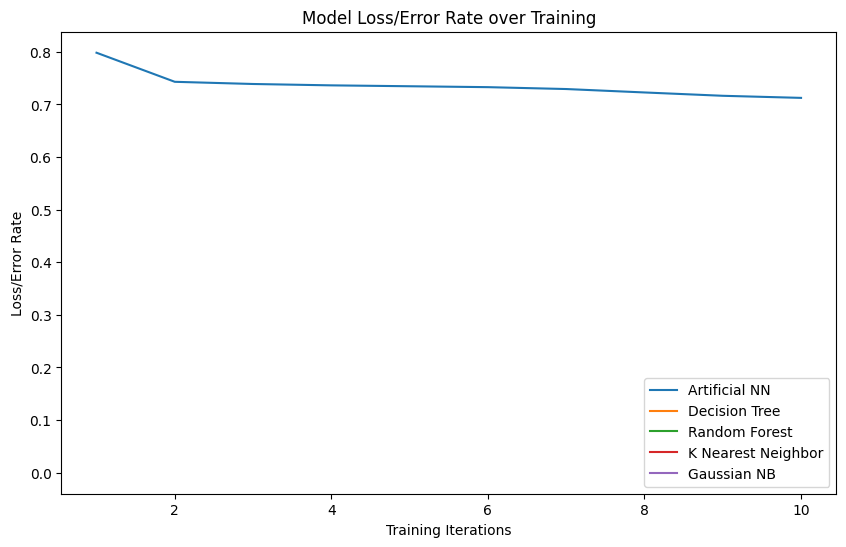

In [ ]:
# Dictionary to store loss values
loss_log = {}

# Iterate over each classifier and evaluate performance
for clf_name, clf in classfiers:
    # Perform cross-validation
    # scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Calculate average performance metrics
    # train_avg_accuracy = scores.mean()
    # train_avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    # train_avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # train_accuracy_scores.append(train_avg_accuracy)
    # train_precision_scores.append(train_avg_precision)
    # train_recall_scores.append(train_avg_recall)

    # Print the training performance metrics
    print(f'Classifier: {clf_name}')
    # print(f'Train Average Accuracy: {train_avg_accuracy: .4f}')
    # print(f'Train Average Precision: {train_avg_precision: .4f}')
    # print(f'Train Average Recall: {train_avg_recall:.4f}')

    # But we will use accuracy measurement on Cross-Validation dataset to pick the best classifier
    history = None
    if clf_name == 'Artificial NN':
        history = clf.fit(X_train, y_train_0_endoded, batch_size=100, epochs=10)
        loss_log[clf_name] = history.history['loss']
    else:
        history = clf.fit(X_train, y_train_0_endoded)
        aaa = clf.score(X_train, y_train_0_endoded)
        print('aaa:', aaa)
        loss_log[clf_name] = [1 - aaa]
    y_hat_train = clf.predict(X_train)
    y_hat_cv = clf.predict(X_cv)
    if clf_name == 'Artificial NN':
        # NN output is matrix of m * 3 -> need to convert into labeling encodes
        y_hat_train = np.argmax(y_hat_train, axis=1)
        y_hat_cv = np.argmax(y_hat_cv, axis=1)
    train_accuracy_scores.append(np.mean(y_hat_train == y_train_0_endoded))
    cv_accuracy_scores.append(np.mean(y_hat_cv == y_cv_0_encoded))
    print('----------------------------------')

print("Train score:",train_accuracy_scores)
print("Cross-validation score:", cv_accuracy_scores)

best_classifier_tuple = classfiers[np.argmax(cv_accuracy_scores)]
print("Best Classifier:", best_classifier_tuple[0])


# # Train models and log loss values
# for name, model in classifiers:
#     train_and_log_loss(name, model)


## 4.2. Fitting best model

In [23]:
X_train.shape

(127617, 12)

In [24]:
# initializing and fitting the random forest classifier
best_classifier_model = classfiers[0][1]

## 4.3. Evaluating model

998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


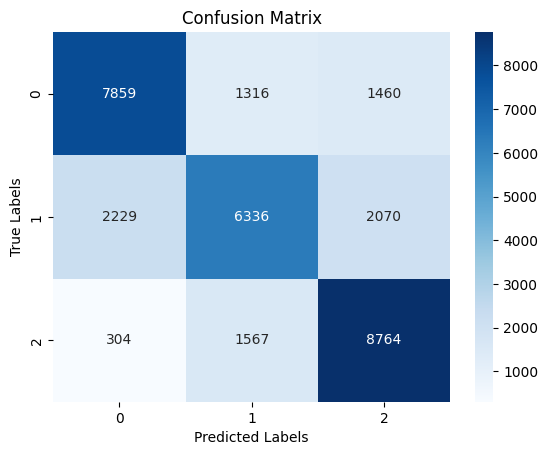

Classification report on Test Dataset
              precision    recall  f1-score   support

           1       0.76      0.74      0.75     10635
           2       0.69      0.60      0.64     10635
           3       0.71      0.82      0.76     10635

    accuracy                           0.72     31905
   macro avg       0.72      0.72      0.72     31905
weighted avg       0.72      0.72      0.72     31905



In [25]:
# making predictions on the test dataset
y_cv_pred = best_classifier_model.predict(X_cv)
y_cv_pred = np.argmax(y_cv_pred, axis=1)
y_cv_pred = y_cv_pred + 1

# evaluating through confusion matrix
cm = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

print("Classification report on Test Dataset")
print(classification_report(y_cv, y_cv_pred))

# 5. Implementing Model on New Data
We now use our credit risk scoring model on a new dataset where the credit scores are absent.

In [26]:
def data_preprocessing(in_data = df):
    imputed_df = preprocess_data_imputation(in_data=in_data)
    imputed_outlier_df, outliers_indices = outlier_capping(data=imputed_df)
    imputed_outlier_encoded_df = categorical_encoding(in_data=imputed_outlier_df)

    # Use final_cols from the training data feature reductions
    # imputed_outlier_encoded_reduced_df = filter_out_correlate_column_pairs(imputed_outlier_encoded_df)
    imputed_outlier_encoded_reduced_df = imputed_outlier_encoded_df[final_X_cols]

    imputed_outlier_encoded_reduced_X = imputed_outlier_encoded_reduced_df
    # imputed_outlier_encoded_reduced_y = imputed_outlier_encoded_reduced_df['Credit_Score']

    # initializing min-max scaler
    scaler = MinMaxScaler()
    # fitting it onto the independent features
    imputed_outlier_encoded_reduced_scaled_X = scaler.fit_transform(imputed_outlier_encoded_reduced_X)
    # imputed_outlier_encoded_reduced_scaled_balanced_X, imputed_outlier_encoded_reduced_balanced_y = smote.fit_resample(imputed_outlier_encoded_reduced_scaled_X, imputed_outlier_encoded_reduced_y)
    return imputed_outlier_encoded_reduced_scaled_X

In [27]:
# importing data where credit scoring needs to be done for new loan applicants
serving_df = pd.read_csv('./datasets/test.csv')

# creating a copy of the serving data
df_new = serving_df.copy()

# columns in the new dataset
df_new.columns # df_new don't have the final column 

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [28]:
imputed_outlier_encoded_reduced_scaled_X_test = data_preprocessing(in_data=df_new)
predictions = best_classifier_model.predict(imputed_outlier_encoded_reduced_scaled_X_test)
# appending the predictions to the original dataset

Column: Name

Missing values imputed with group mode
----------------------------------------------------
Column: Type_of_Loan

Missing values are replaced with 'Not Specified'
----------------------------------------------------
Column: SSN

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Credit_Mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Payment_Behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Monthly_Inhand_Salary

Missing values imputed with group mode
----------------------------------------------------
Column: Num_Credit_Inqui

In [34]:
serving_df['Credit_Score'] = np.argmax(predictions, axis=1)
serving_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,2
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,2
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,2
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,2
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,1
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,0
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,0
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,0


In [35]:
serving_df.Credit_Score.value_counts()

Credit_Score
1    18693
0    16996
2    14311
Name: count, dtype: int64